# Experiment 3
- This experiment is meant to study the effect of Pheromone 

# 1.1 Influence of Pheromone Evaporation

- Here we want to see how pheromone evaporation affects convergence
- We plot the moving averages against the number of iterations 
- the evaporation rate is varied from `[0.0, 0.01, 0.1, 0.25, 0.5]`
- Moving avarage of the path length for each iteration is plotted. Moving average is 4.m

# 1.2 Average path Length

- The average path length is the mean of the path length at every iteration.
- after one iteration, we take the legth of all ants and calculate the average.

In [1]:
import graphs
import SACOAs

# 1.3 Modify Algorithm 
- We need to modify the algothm so as to compute the average path length and the moving averages (path length)
- The moving average is calculated by taking the means of the previous 4 averages. If its less than 4 we take the mean of the last available averages
- We will also need to ouput our moving pathlength and moving averages when the algorithm terminates 
- The algorithm is imported to make use of other functions
- Only the main loop changes 

In [2]:
def SACO(costGraph, takeoff, destination, Population = 8, alpha = 2, rho = 0, iterations = 100, dropout = False, bycost = True): 
    """ takes a costgraph, takeoff point, destination point and number of times to travel (iterations)
    and return a tour """
    
    length = len(costGraph)
    PRM = [[1/length for i in range(length)] for j in range(length)]
    Ants = {"Ant" + str(i+1): None for i in range(Population)}
    
    AVG = []
    MovingAVG = []
    
    while iterations > 0:
        #--------------TRAVEL-----------------------------------------
        for ant in Ants:
            Ants[ant] = SACOAs.Travel(costGraph, PRM, takeoff, destination, alpha, dropout)
        #-------------UPDATE PHEROMONE--------------------------------
        for ant in Ants:
            PRM = SACOAs.Updatepheromone(Ants[ant], PRM, rho, bycost)
            
        #------------GET AVERAGE PATH LENGTH--------------------------
        PathLengths = [ len(Ants[ant]) for ant in Ants ]
        AvgPathLenths = sum(PathLengths)/len(PathLengths)
        #print(PathLengths, AvgPathLenths)
        AVG.append(AvgPathLenths)
        #------------COMPUTE MOVING AVERAGE (4 intervals)---------------------------
        if len(AVG) >= 4:
            MovingAVG.append( sum(AVG[-4:])/4 )
        else:
            MovingAVG.append( sum(AVG)/len(AVG) )
            
        # print("Average ",  AVG , "Moving Average",  MovingAVG)
        #-------------------------------------------------------------
        
        iterations -= 1
        
    return {"Ants": Ants, "PRM":PRM, "AVG": AVG, "MovingAVG": MovingAVG}

# 1.4 Expeiment Proper
- Set paramters 
- create a list for x axis in the range of the number of iterations set

In [3]:
graph = graphs.graph1
takeoff = 0
destination = 8
pop = 64

alpha = 1
rhos = [0.0, 0.01, 0.1, 0.5]
iterations = 1000

# for plotting x- axis
x = [x for x in range(iterations)]

In [4]:
dropout = False
bycost = True

AVG = "AVG"
MAVG = "MovingAVG"

AVGbycost = {AVG + "_" + str(rho):  
                 SACO(graph, takeoff, destination, pop, alpha, rho, iterations, dropout, bycost)[AVG] for rho in rhos}

MovingAVGbycost = {MAVG + "_" + str(rho):  
                   SACO(graph, takeoff, destination, pop, alpha, rho, iterations, dropout, bycost)[MAVG] for rho in rhos}

# 1.5 Plot for Average Path legnth
- the average path length at every iteration

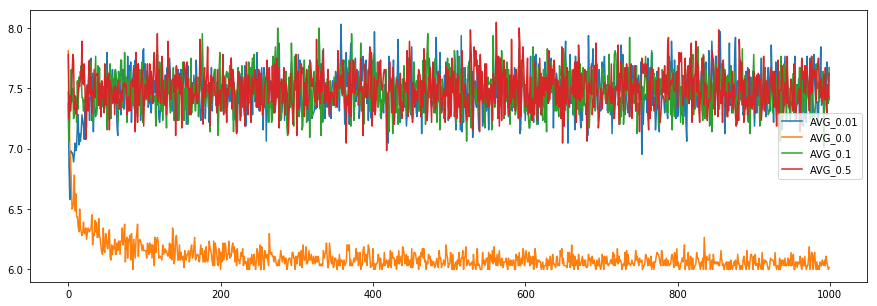

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

for i in AVGbycost:
    plt.plot(x , AVGbycost[i], label = str(i)) 

plt.legend() 
plt.show()

# 1.6 Plot Moving Averages 

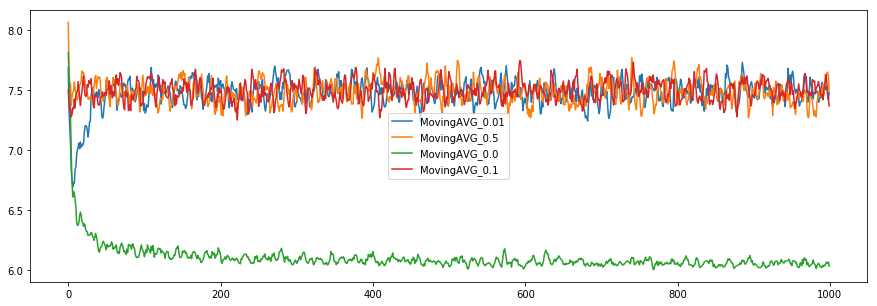

In [16]:
plt.figure(figsize=(15,5))

for i in MovingAVGbycost:
    plt.plot(x , MovingAVGbycost[i], label = str(i)) 

plt.legend() 
plt.show()

# 1.7 Bonus

## Conduct Experiment with a constant pheromone update 

In [17]:
dropout = False
bycost = False

AVGnocost = {AVG + "_" + str(rho):  
                 SACO(graph, takeoff, destination, pop, alpha, rho, iterations, dropout, bycost)[AVG] for rho in rhos}

MovingAVGnocost = {MAVG + "_" + str(rho):  
                   SACO(graph, takeoff, destination, pop, alpha, rho, iterations, dropout, bycost)[MAVG] for rho in rhos}

# Average Plot

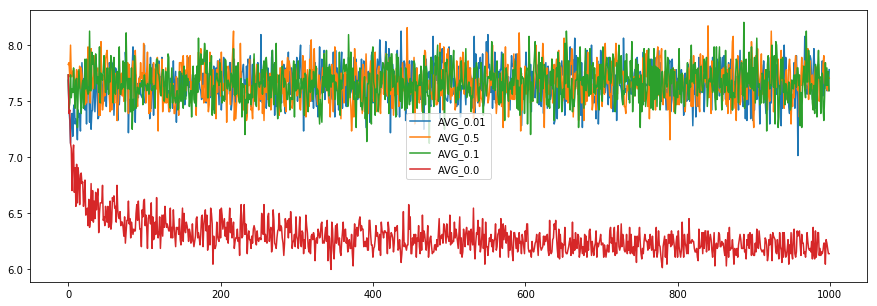

In [18]:
plt.figure(figsize=(15,5))

for i in AVGnocost:
    plt.plot(x , AVGnocost[i], label = str(i)) 

plt.legend() 
plt.show()

# Moving Average Plot

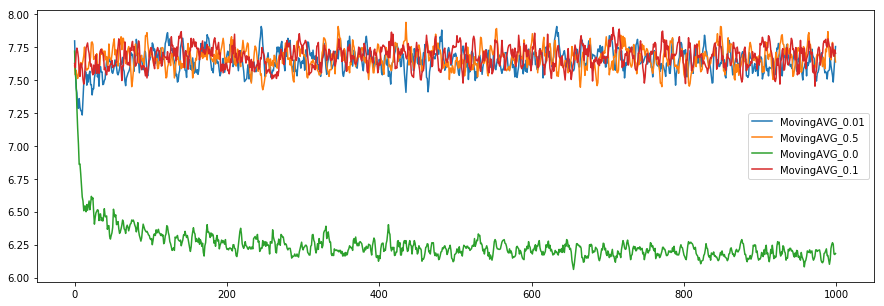

In [19]:
plt.figure(figsize=(15,5))

for i in MovingAVGnocost:
    plt.plot(x , MovingAVGnocost[i], label = str(i)) 

plt.legend() 
plt.show()

# TODO
- Conduct the same experiments above with the graph 2